## Data Exploration + Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/G2 software - CRM Category Product Overviews.csv', encoding='utf-8')

In [3]:
df.head()

,url,product_name,rating,description,product_url,seller,ownership,seller_website,headquarters,total_revenue,...,full_pricing_page,badge,what_is_description,main_category,main_subject,Features,region,country_code,software_product_id,overview_provided_by
0,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,NaN,https://www.efficy.com/,"Brussels, Belgium",NaN,...,https://www.g2.com/products/efficy-crm/pricing,NaN,NaN,CRM Software,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,"[{""Category"":""Platform"",""features"":[{""descript...",EU,BE,efficy-crm,Laetitia Baret
1,https://www.g2.com/products/salesboss/reviews,Salesboss,5.0,"SalesBoss is an all-in-one sales, marketing, c...",https://www.salesboss.ai/pricing,Salesboss,NaN,https://www.salesboss.ai/,NaN,NaN,...,https://www.g2.com/products/salesboss/pricing,NaN,NaN,CRM Software,Home>CRM Software>Salesboss>Salesboss Reviews,NaN,NaN,NaN,salesboss,Prit Pal
2,https://www.g2.com/products/desktop-sales-offi...,Desktop Sales Office,3.0,Desktop Sales Office 2007 is a collection of i...,https://www.g2.com/products/desktop-sales-offi...,The CRM Guide,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CRM Software,Home>CRM Software>Desktop Sales Office>Desktop...,NaN,NaN,NaN,desktop-sales-office,NaN
3,https://www.g2.com/products/atendare-2018-10-2...,Atendare,5.0,Atendare is a complete marketing and sales pla...,https://www.g2.com/products/atendare-2018-10-2...,Inofly,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CRM Software,Home>CRM Software>Atendare>Atendare Reviews,NaN,NaN,NaN,atendare-2018-10-22,NaN
4,https://www.g2.com/products/clinchpad/reviews,ClinchPad,4.8,Close leads faster. Clinch more deals. Simpler...,https://www.g2.com/products/clinchpad/reviews,ClinchPad Technologies Pvt Ltd,NaN,NaN,"New Delhi, IN",NaN,...,https://www.g2.com/products/clinchpad/pricing,NaN,NaN,CRM Software,Home>CRM Software>ClinchPad>ClinchPad Reviews,NaN,AS,IN,clinchpad,"Cheenu MadanFounder, ClinchPad"


In [4]:
print("Column names:\n", df.columns.tolist())

Column names:
 ['url', 'product_name', 'rating', 'description', 'product_url', 'seller', 'ownership', 'seller_website', 'headquarters', 'total_revenue', 'social_media_profiles', 'seller_description', 'reviews_count', 'discussions_count', 'pros_list', 'cons_list', 'competitors', 'highest_rated_features', 'lowest_rated_features', 'rating_split', 'pricing', 'official_screenshots', 'official_downloads', 'official_videos', 'categories', 'user_ratings', 'languages_supported', 'year_founded', 'position_against_competitors', 'overview', 'claimed', 'logo', 'reviews', 'top_alternatives', 'top_alternatives_url', 'full_pricing_page', 'badge', 'what_is_description', 'main_category', 'main_subject', 'Features', 'region', 'country_code', 'software_product_id', 'overview_provided_by']


In [5]:
selected_cols = ['product_name', 'main_category', 'Features', 'rating', 'reviews_count']

df_selected = df[selected_cols].copy()

In [6]:
df_selected['Features'] = df_selected['Features'].str.lower().str.strip()
df_selected['main_category'] = df_selected['main_category'].str.strip()
df_selected['product_name'] = df_selected['product_name'].str.strip()

In [7]:
df_selected.dropna(subset=['product_name', 'main_category', 'Features'], inplace=True)

In [8]:
df_selected.head()

,product_name,main_category,Features,rating,reviews_count
0,Efficy CRM,CRM Software,"[{""category"":""platform"",""features"":[{""descript...",4.5,102.0
6,Zurmo,CRM Software,"[{""category"":""platform"",""features"":[{""descript...",4.6,17.0
7,YetiForce CRM,CRM Software,"[{""category"":""platform"",""features"":[{""descript...",4.4,51.0
18,FinCRM,CRM Software,"[{""category"":""platform"",""features"":[{""descript...",4.3,19.0
19,Fireberry,CRM Software,"[{""category"":""platform"",""features"":[{""descript...",4.8,21.0


## Testing Capability Matching & Similarity Scoring

In [9]:
df = df_selected.copy()

In [10]:
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
def extract_feature_names(raw_features):
    try:
        outer_list = ast.literal_eval(raw_features)
        feature_names = []

        for item in outer_list:
            inner_features = item.get("features", [])
            for feat in inner_features:
                if isinstance(feat, dict):
                    name = feat.get("name", "").strip().lower()
                    if name:
                        feature_names.append(name)
                        
        return " ".join(feature_names)
    
    except Exception as e:
        return ""

In [12]:
df['parsed_features'] = df['Features'].apply(extract_feature_names)
df[['product_name', 'parsed_features']].head()

,product_name,parsed_features
0,Efficy CRM,"customization workflow capability user, role, ..."
6,Zurmo,"customization workflow capability user, role, ..."
7,YetiForce CRM,"customization workflow capability user, role, ..."
18,FinCRM,"customization workflow capability user, role, ..."
19,Fireberry,"customization workflow capability user, role, ..."


In [13]:
user_category = "CRM Software"
df_filtered = df[df['main_category'].str.lower() == user_category.lower()].reset_index(drop=True)

In [14]:
user_capabilities = ["workflow capability", "access management"]
query_string = " ".join([cap.lower().strip() for cap in user_capabilities])

In [15]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_filtered['parsed_features'])
user_vector = vectorizer.transform([query_string])

In [16]:
similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()
df_filtered['similarity_score'] = similarity_scores

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


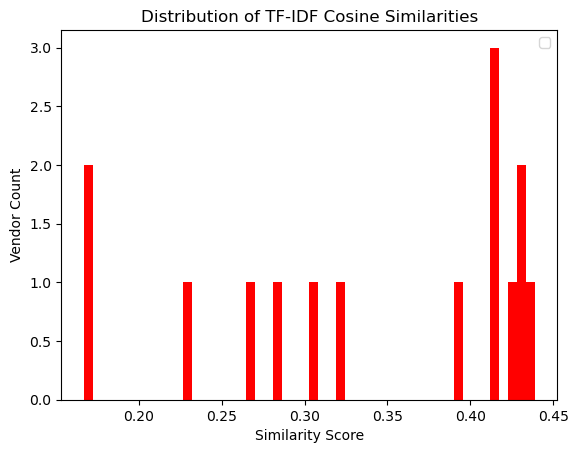

In [17]:
import matplotlib.pyplot as plt

plt.hist(df_filtered['similarity_score'], bins=50, color='red')
plt.title("Distribution of TF-IDF Cosine Similarities")
plt.xlabel("Similarity Score")
plt.ylabel("Vendor Count")
plt.legend()
plt.show()

In [18]:
threshold = 0.4
results = df_filtered[df_filtered['similarity_score'] >= threshold].copy()
results = results.sort_values(by='similarity_score', ascending=False)

In [19]:
results[['product_name', 'similarity_score', 'rating', 'reviews_count']].head(10)

,product_name,similarity_score,rating,reviews_count
2,YetiForce CRM,0.438956,4.4,51.0
11,Kommo,0.433492,3.7,30.0
14,Prospect CRM,0.430641,4.6,90.0
4,Fireberry,0.424945,4.8,21.0
1,Zurmo,0.413865,4.6,17.0
3,FinCRM,0.413865,4.3,19.0
5,Solid Performers CRM,0.413865,4.9,52.0


## Testing Vendor Ranking 

In [20]:
results['normalized_rating'] = results['rating'] / 5.0

In [21]:
results['final_score'] = (0.7 * results['similarity_score']) + (0.3 * results['normalized_rating'])
ranked_vendors = results.sort_values(by='final_score', ascending=False).reset_index(drop=True)
ranked_vendors[['product_name', 'similarity_score', 'rating', 'normalized_rating', 'final_score']].head(10)

,product_name,similarity_score,rating,normalized_rating,final_score
0,Fireberry,0.424945,4.8,0.96,0.585462
1,Solid Performers CRM,0.413865,4.9,0.98,0.583705
2,Prospect CRM,0.430641,4.6,0.92,0.577449
3,YetiForce CRM,0.438956,4.4,0.88,0.571269
4,Zurmo,0.413865,4.6,0.92,0.565705
5,FinCRM,0.413865,4.3,0.86,0.547705
6,Kommo,0.433492,3.7,0.74,0.525444


## Looking into Rank System Improvements

In [22]:
import numpy as np

# incoporating reviews_count as a trust/confidence signal

results['log_reviews'] = np.log1p(results['reviews_count'])
results['normalized_reviews'] = results['log_reviews'] / results['log_reviews'].max()


results['final_score'] = (
    0.6 * results['similarity_score'] +
    0.25 * (results['rating'] / 5.0) +
    0.15 * results['normalized_reviews']
)

In [23]:
results['old_score'] = (
    0.7 * results['similarity_score'] +
    0.3 * (results['rating'] / 5.0)
)

comparison = results.sort_values(by='final_score', ascending=False)[[
    'product_name', 'similarity_score', 'rating', 'reviews_count',
    'old_score', 'final_score'
]].reset_index(drop=True)

comparison.head(10)

,product_name,similarity_score,rating,reviews_count,old_score,final_score
0,Prospect CRM,0.430641,4.6,90.0,0.577449,0.638385
1,Solid Performers CRM,0.413865,4.9,52.0,0.583705,0.625343
2,YetiForce CRM,0.438956,4.4,51.0,0.571269,0.614765
3,Fireberry,0.424945,4.8,21.0,0.585462,0.597754
4,Zurmo,0.413865,4.6,17.0,0.565705,0.574433
5,FinCRM,0.413865,4.3,19.0,0.547705,0.562936
6,Kommo,0.433492,3.7,30.0,0.525444,0.559286


In [24]:
results['rank_old'] = results['old_score'].rank(ascending=False)
results['rank_new'] = results['final_score'].rank(ascending=False)

results['rank_change'] = results['rank_old'] - results['rank_new']

results.sort_values(by='rank_change', ascending=False)[[
    'product_name', 'rank_old', 'rank_new', 'rank_change'
]].head(10)

,product_name,rank_old,rank_new,rank_change
14,Prospect CRM,3.0,1.0,2.0
2,YetiForce CRM,4.0,3.0,1.0
11,Kommo,7.0,7.0,0.0
1,Zurmo,5.0,5.0,0.0
3,FinCRM,6.0,6.0,0.0
5,Solid Performers CRM,2.0,2.0,0.0
4,Fireberry,1.0,4.0,-3.0


In [25]:
# Testing different weights
weights_list = [
    (0.7, 0.2, 0.1),
    (0.6, 0.25, 0.15),
    (0.5, 0.3, 0.2)
]

for sim_w, rating_w, review_w in weights_list:
    results['score'] = (
        sim_w * results['similarity_score'] +
        rating_w * (results['rating'] / 5.0) +
        review_w * results['normalized_reviews']
    )
    top = results.sort_values(by='score', ascending=False).head(1)
    print(f"Top: {top['product_name'].values[0]} | Score: {top['score'].values[0]:.4f} | Weights: {sim_w}-{rating_w}-{review_w}")

Top: Prospect CRM | Score: 0.5854 | Weights: 0.7-0.2-0.1
Top: Prospect CRM | Score: 0.6384 | Weights: 0.6-0.25-0.15
Top: Prospect CRM | Score: 0.6913 | Weights: 0.5-0.3-0.2


In [26]:
best_weights = None
best_range = -np.inf
best_result = None

weight_grid = []

# Generate combos that sum to 1.0
for sim in np.arange(0.4, 0.71, 0.05):
    for rating in np.arange(0.1, 0.41, 0.05):
        review = 1.0 - sim - rating
        if review < 0 or review > 0.4:
            continue
        weight_grid.append((sim, rating, review))

for sim_w, rating_w, review_w in weight_grid:
    results['score'] = (
        sim_w * results['similarity_score'] +
        rating_w * (results['rating'] / 5.0) +
        review_w * results['normalized_reviews']
    )
    ranked = results.sort_values(by='score', ascending=False).reset_index(drop=True)
    n = min(10, len(ranked))
    if n > 1:
        score_range = ranked.loc[0, 'score'] - ranked.loc[n-1, 'score']
    else:
        score_range = 0

    if score_range > best_range:
        best_range = score_range
        best_weights = (sim_w, rating_w, review_w)
        best_result = ranked.copy()

print(f"Best Weights Found: Similarity={best_weights[0]}, Rating={best_weights[1]}, Reviews={best_weights[2]}")
print(f"Score separation between rank 1 and {n}: {best_range:.4f}")
best_result[['product_name', 'score']].head(10)

Best Weights Found: Similarity=0.4, Rating=0.20000000000000004, Reviews=0.3999999999999999
Score separation between rank 1 and 7: 0.1531


,product_name,score
0,Prospect CRM,0.756256
1,Solid Performers CRM,0.713611
2,YetiForce CRM,0.701959
3,Fireberry,0.636076
4,Kommo,0.625905
5,Zurmo,0.605849
6,FinCRM,0.603192


## Improving Feature Matching
(beyond basic tf-idf)

In [27]:
def has_exact_match(parsed_features: str, capabilities: list) -> bool:
    return any(cap.lower() in parsed_features for cap in capabilities)

In [28]:
user_capabilities = ["workflow capability", "access management"]
query_string = " ".join([cap.lower().strip() for cap in user_capabilities])

df_filtered = df[df['main_category'].str.lower() == "crm software"].copy()

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df_filtered['parsed_features'])
user_vector = vectorizer.transform([query_string])

similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()
df_filtered['similarity_score'] = similarity_scores

threshold = 0.30
df_filtered = df_filtered[df_filtered['similarity_score'] >= threshold].copy()

df_filtered['exact_match'] = df_filtered['parsed_features'].apply(
    lambda f: has_exact_match(f, user_capabilities)
)
df_filtered['similarity_score'] += 0.05 * df_filtered['exact_match'].astype(float)

df_filtered = df_filtered.sort_values(by='similarity_score', ascending=False).reset_index(drop=True)
df_filtered[['product_name', 'similarity_score', 'exact_match']].head(10)


,product_name,similarity_score,exact_match
0,YetiForce CRM,0.384028,True
1,Kommo,0.380984,True
2,Prospect CRM,0.379763,True
3,Fireberry,0.373079,True
4,Zurmo,0.369136,True
5,FinCRM,0.369136,True
6,Solid Performers CRM,0.369136,True


Testing out SBERT

In [29]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode vendor features and user query
vendor_embeddings = model.encode(df_filtered['parsed_features'].tolist(), convert_to_tensor=True)
query_embedding = model.encode("workflow capability access management", convert_to_tensor=True)

# Compute cosine similarity
cos_scores = util.cos_sim(query_embedding, vendor_embeddings)[0].cpu().numpy()

df_filtered['similarity_score'] = cos_scores
df_filtered = df_filtered.sort_values(by='similarity_score', ascending=False)
df_filtered[['product_name', 'similarity_score']].head(10)

,product_name,similarity_score
0,YetiForce CRM,0.532032
3,Fireberry,0.521663
2,Prospect CRM,0.519518
1,Kommo,0.512096
4,Zurmo,0.506165
5,FinCRM,0.506165
6,Solid Performers CRM,0.506165


In [30]:
# Comparing SBERT vs TF-IDF

user_capabilities = ["workflow capability", "access management"]
query_string = " ".join([cap.lower().strip() for cap in user_capabilities])

df_eval = df[df['main_category'].str.lower() == "crm software"].copy()

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df_eval['parsed_features'])
tfidf_query = tfidf_vectorizer.transform([query_string])
df_eval['tfidf_score'] = cosine_similarity(tfidf_query, tfidf_matrix).flatten()

sbert_model = SentenceTransformer("all-MiniLM-L6-v2")
vendor_embeddings = sbert_model.encode(df_eval['parsed_features'].tolist(), convert_to_tensor=True)
query_embedding = sbert_model.encode(query_string, convert_to_tensor=True)
df_eval['sbert_score'] = util.cos_sim(query_embedding, vendor_embeddings)[0].cpu().numpy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_eval[['tfidf_score', 'sbert_score']] = scaler.fit_transform(df_eval[['tfidf_score', 'sbert_score']])

df_eval[['product_name', 'tfidf_score', 'sbert_score']].sort_values(
    by='sbert_score', ascending=False
).head(10)

,product_name,tfidf_score,sbert_score
7,YetiForce CRM,1.000000,1.000000
19,Fireberry,0.950250,0.948778
56,Prospect CRM,0.980617,0.938182
43,Kommo,0.986168,0.901519
6,Zurmo,0.932334,0.872217
18,FinCRM,0.932334,0.872217
23,Solid Performers CRM,0.932334,0.872217
53,EspoCRM,0.452484,0.383490
30,Breakcold,0.666211,0.293639
0,Efficy CRM,0.533134,0.269305


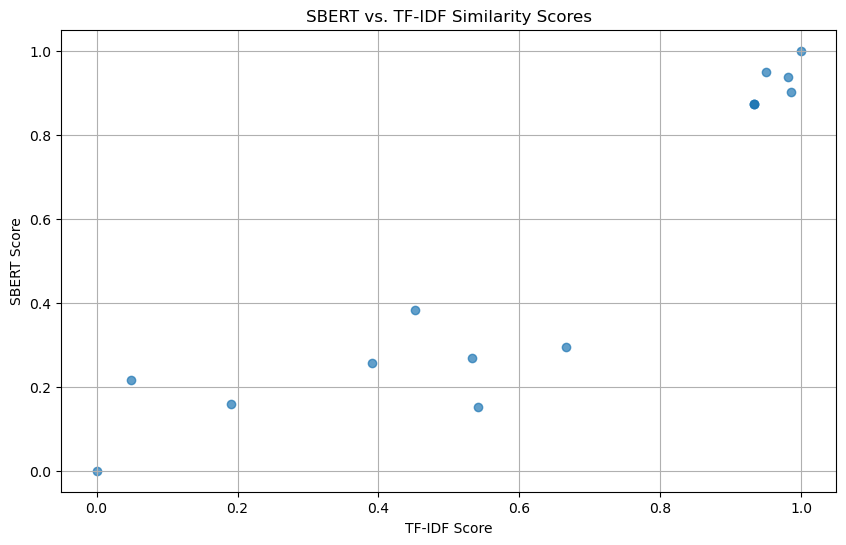

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df_eval['tfidf_score'], df_eval['sbert_score'], alpha=0.7)
plt.xlabel("TF-IDF Score")
plt.ylabel("SBERT Score")
plt.title("SBERT vs. TF-IDF Similarity Scores")
plt.grid(True)
plt.show()